### Project Title 
## Netflix Data: Cleaning, Analysis and Visualization

#### Step 1: Import Required Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Step 2: Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('netflix1.csv')

##### Exploring the Data

In [3]:
# Display the first few rows of the dataset
df.head()

show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [4]:
# Get concise summary information about the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Get the dimensions of the DataFrame (number of rows and columns)
df.shape

(8790, 10)

In [6]:
df.describe(include='all')

show_id   type  title   director        country date_added  \
count     8790   8790   8790       8790           8790       8790   
unique    8790      2   8787       4528             86       1713   
top         s1  Movie  9-Feb  Not Given  United States   1/1/2020   
freq         1   6126      2       2588           3240        110   
mean       NaN    NaN    NaN        NaN            NaN        NaN   
std        NaN    NaN    NaN        NaN            NaN        NaN   
min        NaN    NaN    NaN        NaN            NaN        NaN   
25%        NaN    NaN    NaN        NaN            NaN        NaN   
50%        NaN    NaN    NaN        NaN            NaN        NaN   
75%        NaN    NaN    NaN        NaN            NaN        NaN   
max        NaN    NaN    NaN        NaN            NaN        NaN   

        release_year rating  duration                     listed_in  
count    8790.000000   8790      8790                          8790  
unique           NaN     14       220                           513  
top              NaN  TV-MA  1 Season  Dramas, International Movies  
freq             NaN   3205      1791                           362  
mean     2014.183163    NaN       NaN                           NaN  
std         8.825466    NaN       NaN                           NaN  
min      1925.000000    NaN       NaN                           NaN  
25%      2013.000000    NaN       NaN                           NaN  
50%      2017.000000    NaN       NaN                           NaN  
75%      2019.000000    NaN       NaN                           NaN  
max      2021.000000    NaN       NaN                           NaN

### Step 3: Data Cleaning
Identify and handle missing data, correct data types, and drop duplicates.


In [7]:
# Check for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
# Checking duplicates if any
df.duplicated().sum()

0

In [9]:
# Converting the date-added(object) to date-time datatype
df['date_added']= pd.to_datetime(df['date_added'])

In [10]:
# for knowing the datatypes of columns
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [11]:
#  For numerical description
df.describe()

date_added  release_year
count                           8790   8790.000000
mean   2019-05-17 21:44:01.638225408   2014.183163
min              2008-01-01 00:00:00   1925.000000
25%              2018-04-06 00:00:00   2013.000000
50%              2019-07-03 00:00:00   2017.000000
75%              2020-08-19 18:00:00   2019.000000
max              2021-09-25 00:00:00   2021.000000
std                              NaN      8.825466

In [12]:
# Extracting object columns
df_object_columns = df.select_dtypes(include = ['object']).columns

In [13]:
df_object_columns

Index(['show_id', 'type', 'title', 'director', 'country', 'rating', 'duration',
       'listed_in'],
      dtype='object')

In [14]:
# Extracting numeric and date-time column
df_numerical_columns = df.select_dtypes(include = ['int64','datetime64[ns]']).columns

In [15]:
df_numerical_columns

Index(['date_added', 'release_year'], dtype='object')

In [16]:
# Getting the value counts of each object datatypes
def object_value_counts(df,columns):
    count = {col : df[col].value_counts() for col in columns}
    return count

In [17]:
result = object_value_counts(df,df_object_columns)

for col, counts in result.items():
    print(f"--- {col} ---")
    print(counts, "\n")

--- show_id ---
show_id
s1       1
s7990    1
s7982    1
s7984    1
s7986    1
        ..
s3960    1
s3958    1
s3956    1
s3955    1
s8786    1
Name: count, Length: 8790, dtype: int64 

--- type ---
type
Movie      6126
TV Show    2664
Name: count, dtype: int64 

--- title ---
title
9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: count, Length: 8787, dtype: int64 

--- director ---
director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muz

### Step 4: Exploratory Data Analysis (EDA)

In [18]:
# Defining colors for better visualization

NETFLIX_RED = '#b20710'
NETFLIX_DARK = '#221f1f'

### (A). Content Distribution Analysis

#### 1. Content Type Distribution: Movies vs TV Shows

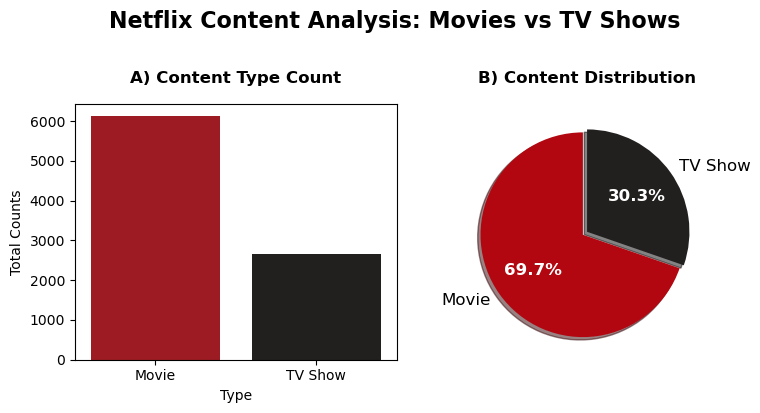

In [19]:
# Set up the figure
plt.figure(figsize=(8, 4))  # Wider figure for side-by-side plots

# --- SUBPLOT 1: Count Plot ---
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
ax1 = sns.countplot(x='type', data=df, palette=[NETFLIX_RED, NETFLIX_DARK])  # Netflix colors

ax1.set_title('A) Content Type Count', fontweight='bold', pad=15)
ax1.set_xlabel('Type')
ax1.set_ylabel('Total Counts')

# --- SUBPLOT 2: Pie Chart ---
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
type_counts = df['type'].value_counts()

# Create pie with Netflix colors
patches, texts, autotexts = plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[NETFLIX_RED, NETFLIX_DARK],
    explode=(0.05, 0),
    shadow=True,
    textprops={'fontsize': 12}
)

# Style autopct labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('B) Content Distribution', fontweight='bold', pad=15)

# --- Final Touches ---
plt.suptitle('Netflix Content Analysis: Movies vs TV Shows', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()  # Prevent overlapping
plt.show()

##### Analysis of Netflix Content Type Distribution
##### Movies dominate the catalog
> The bar chart reveals a significant disparity between Movies (6,126 titles) and TV Shows (2,664 titles) on Netflix.
> The pie chart reveals the distribution that Movies are making up ~70% of the total content, while TV shows account for only ~30%.

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (B). Geographic Analysis

#### 1. Top Content-Producing Countries

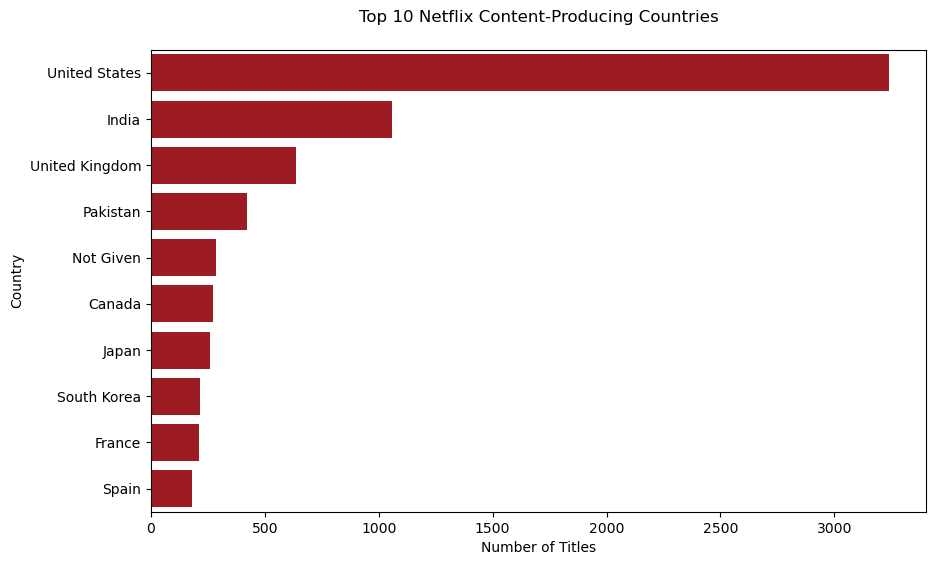

In [20]:
# Top 10 Countries by Netflix Content Production

top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette=[NETFLIX_RED]*10 # Gradient red
)
plt.title('Top 10 Netflix Content-Producing Countries',pad=20)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### Analysis of Netflix Top Content-Producing Countries
The data highlights a clear dominance of the United States (3,240 titles), followed by India (1,057) and the United Kingdom (638).

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (C). Director Analysis

#### 1. Top most prolific directors

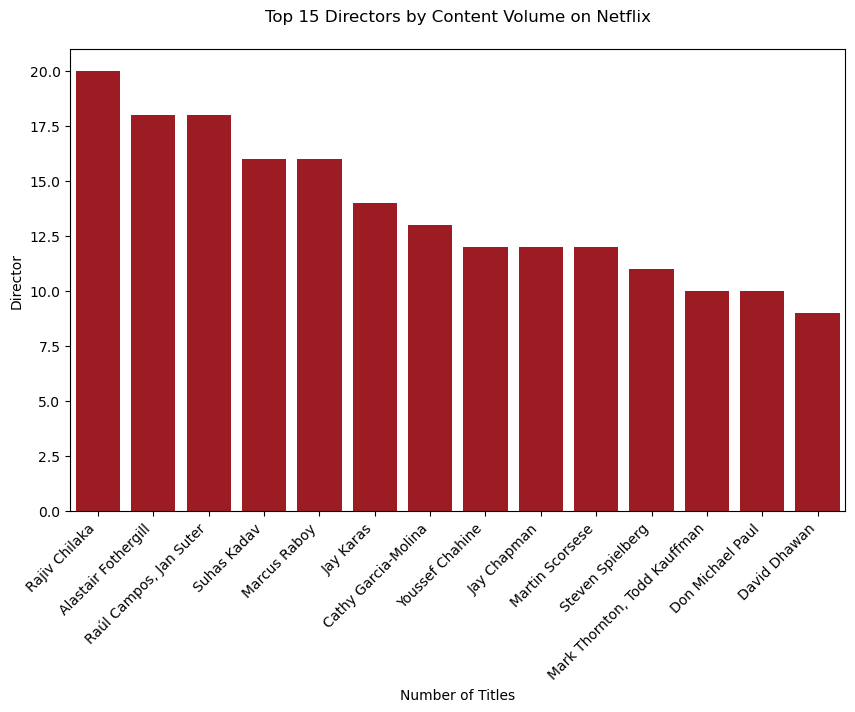

In [21]:
# Top 15 Directors with most numbers of Content
top_directors =
df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]


# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_directors['director'],
    y=top_directors['count'],
    palette=[NETFLIX_RED]*10
)
plt.title('Top 15 Directors by Content Volume on Netflix',pad=20)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Analysis of Top Netflix Directors by Content Volume

The data reveals the most prolific directors on Netflix, measured by their number of credited titles:
Rajiv Chilaka (20 titles),
Alastair Fothergill (18 titles), 
Raúl Campos & Jan Suter (18 titles), 
Suhas Kadav (16 titles), 
Marcus Raboy (16 titles).

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (D). Rating Analysis

#### 1.  Top Rating distribution

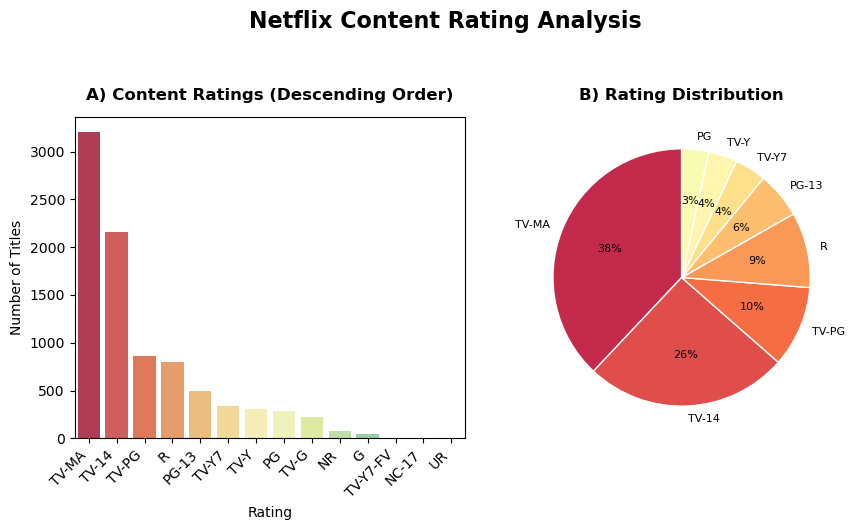

In [22]:
# Set up the figure
plt.figure(figsize=(9, 5))

# --- Data Preparation ---
rating_counts = df['rating'].value_counts().sort_values(ascending=False)
palette = sns.color_palette("Spectral", len(rating_counts))  # Color gradient

# --- SUBPLOT 1: Bar Chart (Descending Order) ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=rating_counts.index, y=rating_counts.values,palette=palette, order=rating_counts.index)

plt.title('A) Content Ratings (Descending Order)', fontweight='bold', pad=12)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability

# --- SUBPLOT 2: Pie Chart ---
plt.subplot(1, 2, 2)

ax2 = plt.pie(
    rating_counts[:8],
    labels=rating_counts[:8].index,
    autopct='%.0f%%',
    startangle=90,
    colors=palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 8}
)
plt.title('B) Rating Distribution', fontweight='bold', pad=12)

# --- Final Adjustments ---
plt.suptitle('Netflix Content Rating Analysis', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

#### Analysis of Netflix Content Ratings Distribution
The data reveals a clear breakdown of content maturity levels, highlighting Netflix’s strategic focus on specific audience segments:

###### Key Observations
###### Dominance of Mature Content

> TV-MA (3205 titles, ~40%) and TV-14 (2157 titles, ~27%) dominate, indicating Netflix’s strong emphasis on adult-oriented programming.                 
> R-rated (799 titles, ~10%) films further reinforce this trend, catering to audiences seeking edgier, unrestricted content.

###### Family & Younger Audiences

> TV-PG (861 titles, ~11%) and TV-Y7/Y (639 titles combined, ~8%) represent a smaller but significant share.                                            
> G (41 titles) and TV-G (220 titles) are relatively sparse.

###### Niche & Unrated Content

> NR (Not Rated, 79 titles) and UR (Unrated, 3 titles).                                                                                                 
> NC-17 (3 titles) is minimal.

-------------------------------------------------------------------------------------------------------------

#### 2. Rating Distribution by Content Type (Movies vs TV Shows)

Text(0.5, 1.0, 'Rating Distribution by Content Type')

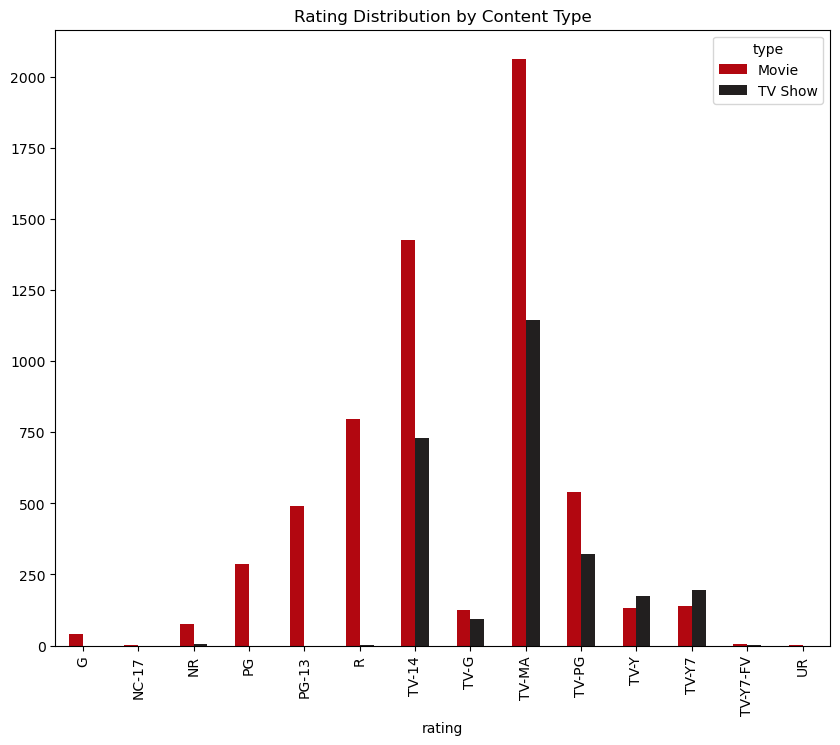

In [23]:
# Rating distribution by type

pd.crosstab(df['rating'], df['type']).plot(kind='bar',
            figsize=(10,8), color = [NETFLIX_RED,NETFLIX_DARK])

plt.title('Rating Distribution by Content Type')

##### Analysis of Netflix Content Ratings by Type (Movies vs. TV Shows)

###### Key Findings at a Glance

###### Movies Dominate Restricted Content

> R (797 movies vs. 2 TV shows), PG-13 (490 vs. 0), and NC-17 (3 vs. 0) ratings appear almost exclusively in movies.

###### TV Shows Lean Toward Milder Ratings

> TV-14 (730 TV shows vs. 1,427 movies) and TV-MA (1,143 TV shows vs. 2,062 movies) dominate series, but with a more balanced split.

###### Family Content Skews TV-Heavy

> TV-Y (175 TV shows vs. 131 movies) and TV-Y7 (194 vs. 139) are more common in series.
> G-rated (41 movies, 0 TV shows) or PG (287 movies, 0 TV shows) series exist—a potential white space.

###### Unrated/Obscure Ratings Are Rare

> NR (75 movies, 4 TV shows) and UR (3 movies, 0 TV shows) are minimal.

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (E). Genre Analysis

#### 1. Most Common Genres on Netflix

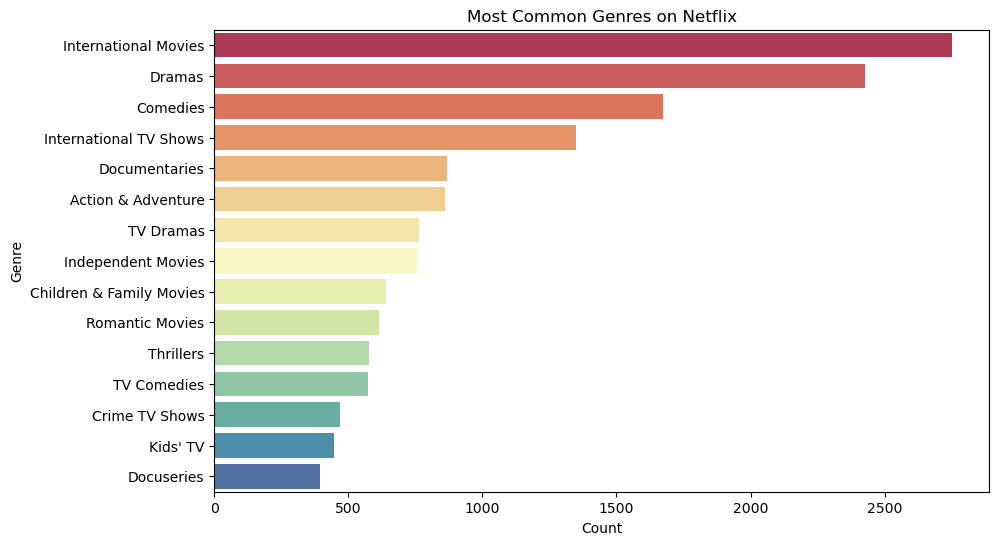

In [24]:
# Split the 'listed_in' column and count genres
df['genres'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(15)

palette = sns.color_palette("Spectral", len(genre_counts))  # Color gradient

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette=palette )
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### Genre Analysis of Netflix's Content Library
###### Dominant Content Categories

> International Movies (2,752) and International TV Shows (1,349) collectively form the largest segment (~30% of listed genres).                        
> Dramas (2,426) and TV Dramas (762) highlight Netflix's focus on serialized storytelling.                                                              
> Comedies (1,674) and TV Comedies (573) indicate strong demand.                                                                                        
> Action & Adventure (859) and Thrillers (577) cater to viewers seeking high-energy content .

#### 2. Tree Map of Genre Distribution

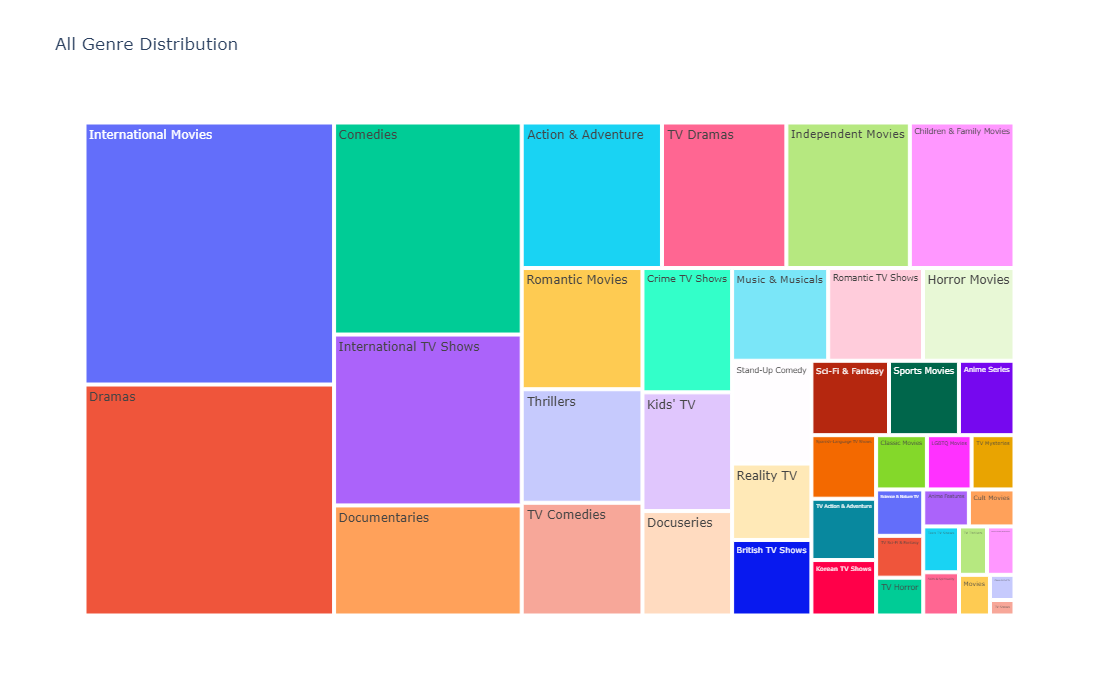

<Figure size 1500x1000 with 0 Axes>

In [25]:
genre_count_all = pd.Series(all_genres).value_counts().reset_index()
genre_count_all.columns = ['Genre', 'Counts']

plt.figure(figsize=(15, 10))
fig = px.treemap(genre_count_all, path=['Genre'], values='Counts'
                 , title='All Genre Distribution', width=1200,height=700)
fig.show()

-------------------------------------------------------------------------------------------------------------

#### 3. Genre Distribution by Content Type (Movies and TV Shows)

#### Most popular movie genres

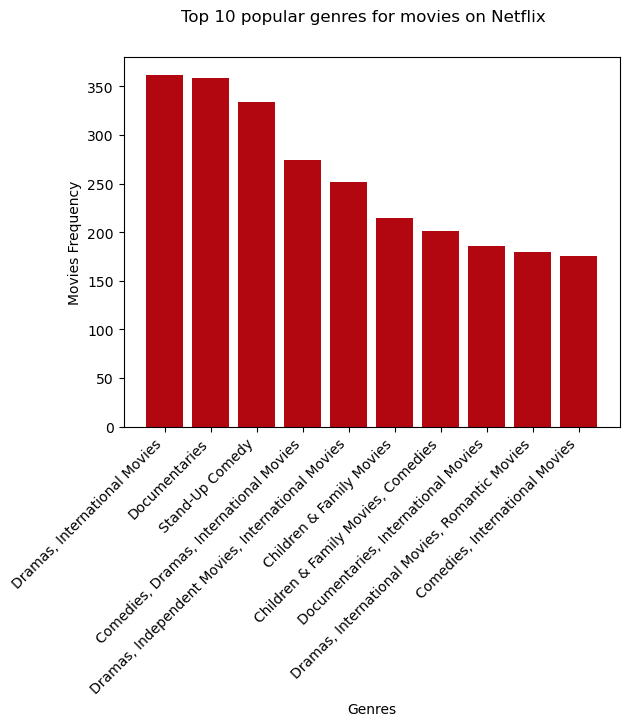

In [26]:
# Top 10 popular movie genres

popular_movie_genre=df[df['type']==
'Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values, color = NETFLIX_RED)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

#### Analysis of Netflix's Movie Genres
> Dramas, International Movies" (362) is the top hybrid category. Dramas, Independent Movies, International Movies" (252) and "Dramas, International Movies, Romantic Movies" (180) is also highlighted.                                                                                      
> Documentaries (359) and "Documentaries, International Movies" (186) show Netflix’s investment in non-fiction storytelling.                            
> Stand-Up Comedy (334) confirms the platform’s dominance in comedy specials.

-------------------------------------------------------------------------------------------------------------

#### Most popular TV Shows genres

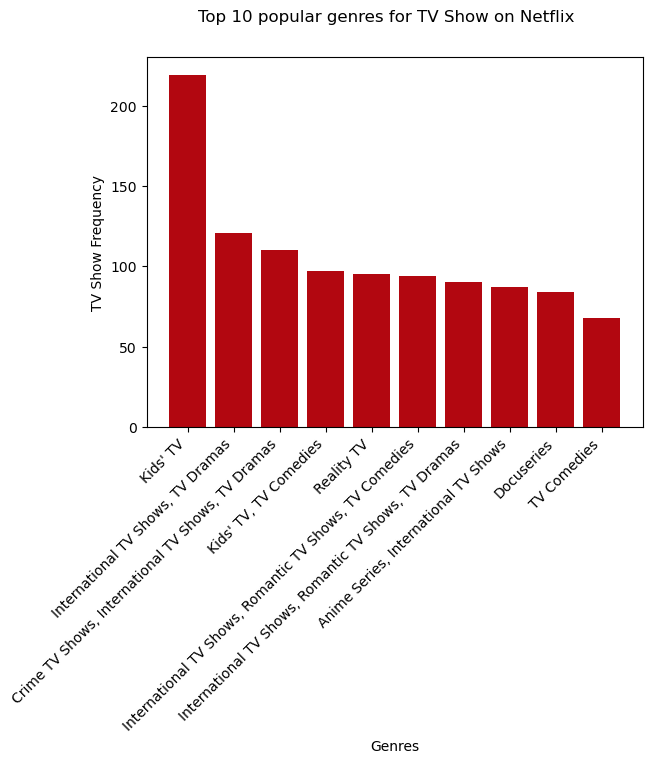

In [27]:
# Top 10 popular TV Shows genres

popular_series_genre=df[df['type']==
'TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_series_genre.index, popular_series_genre.values, color = NETFLIX_RED)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Show Frequency")
plt.suptitle("Top 10 popular genres for TV Show on Netflix")
plt.show()

##### Analysis of Netflix's Top TV Show Genres
> "Kids' TV" (219) is the #1 genre                                                                                                                     
> "International TV Shows, TV Dramas" (121) and "Crime TV Shows, International TV Shows, TV Dramas" (110) confirm the success of foreign-language hits. 
> Reality TV (95) is a high-engagement category.                                                                                                     
> Reality TV (95) (Selling Sunset, Love Is Blind) is a low-cost, high-engagement category.

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (F). Duration Analysis

#### 1. Movie duration distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_15800\1898388661.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



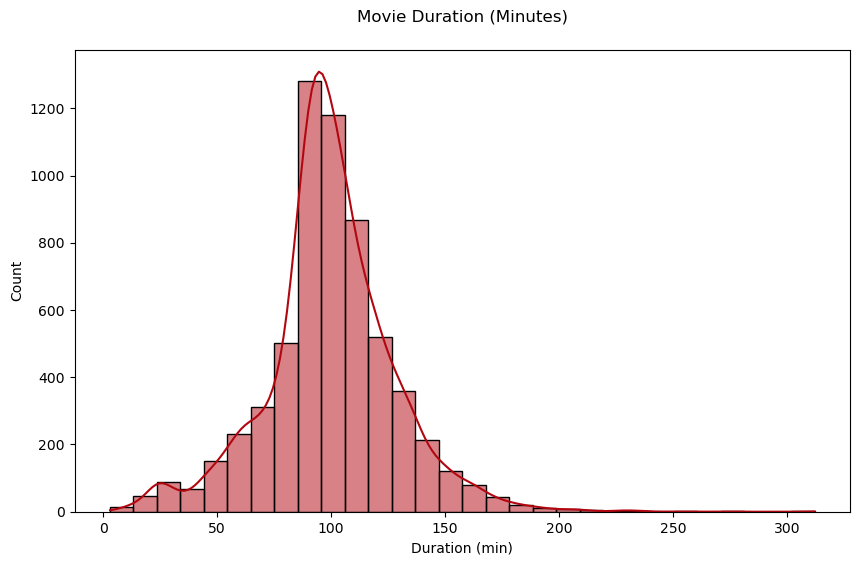

In [28]:
# Movie duration distribution

# Extract minutes for movies
movies = df[df['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    movies['duration_min'],
    bins=30,
    color=NETFLIX_RED,
    edgecolor='black',
    kde=True
)
plt.title('Movie Duration (Minutes)', pad=20)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

-------------------------------------------------------------------------------------------------------------

#### 2. TV show seasons distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_15800\1276907313.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



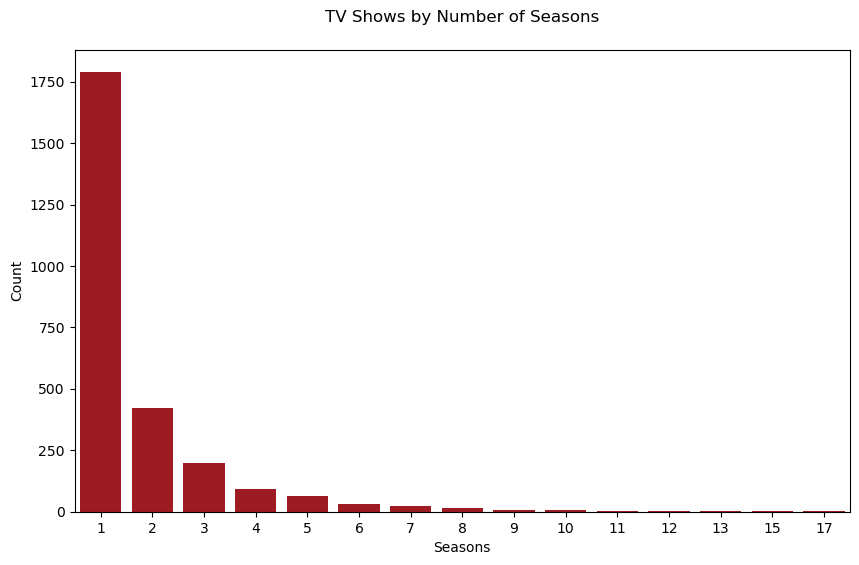

In [29]:
# TV show seasons distribution

# Extract seasons for TV shows
tv_shows = df[df['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
seasons_counts = tv_shows['seasons'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=seasons_counts.index,
    y=seasons_counts.values,
    palette=[NETFLIX_RED]*10
)
plt.title('TV Shows by Number of Seasons', pad=20)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### Step 5 : Feature Engineering
Creating new columns for deeper analysis and suitable visualization.                                                           
There are some necessary feature engineering require for furthur visualization.

In [30]:
#  Creating 3 New Columns

df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

### (G). Time Series Analysis

#### 1. Content Release Year Distribution

Text(0.5, 1.0, 'Content Release Year Distribution')

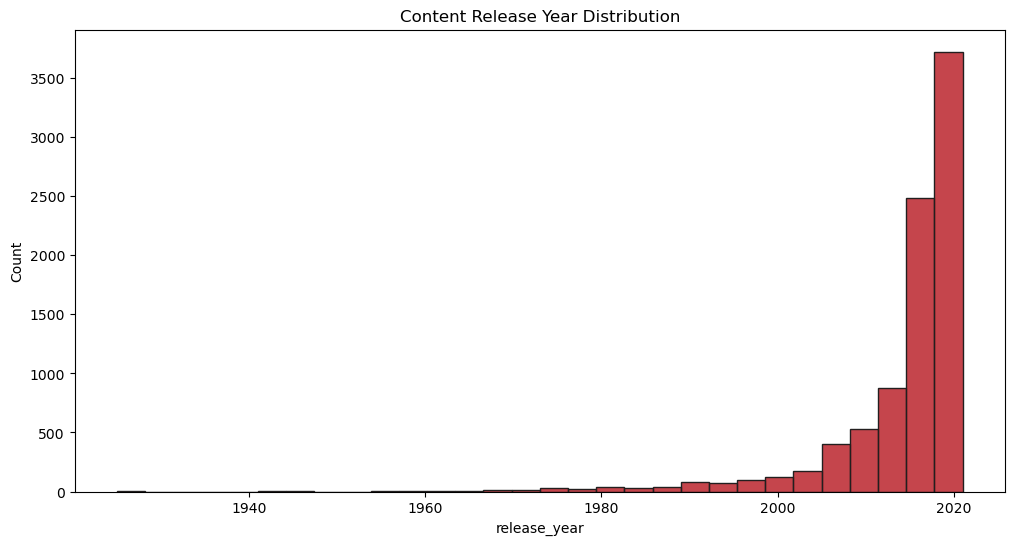

In [31]:
#  content release by years
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, color=NETFLIX_RED ,edgecolor=NETFLIX_DARK)
plt.title('Content Release Year Distribution')

-------------------------------------------------------------------------------------------------------------

#### 2. Content Addition on Netflix 

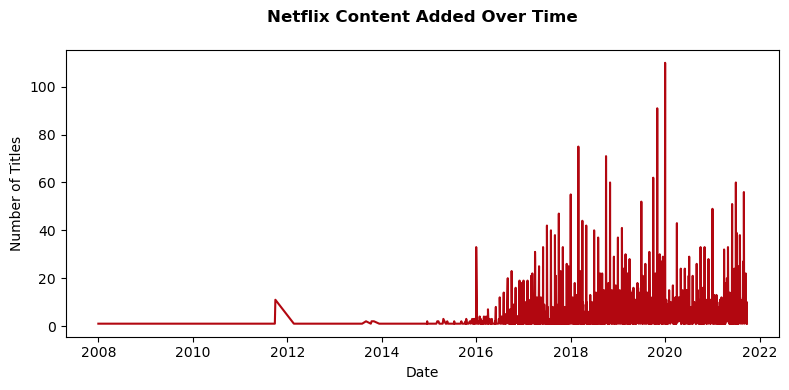

In [32]:
# 1. Group data
ts_data = df.groupby('date_added')['show_id'].count().reset_index(name='count')

# 2. Create the plot with Seaborn
plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=ts_data,
    x='date_added',
    y='count',
    color=NETFLIX_RED,
    linewidth=1.5,
)
plt.title('Netflix Content Added Over Time', fontweight='bold',pad=20)
plt.xlabel('Date')
plt.ylabel('Number of Titles')

plt.tight_layout()  # Prevent label clipping
plt.show()

-------------------------------------------------------------------------------------------------------------

#### 3. Content Addition Distribution by Years on Netflix 

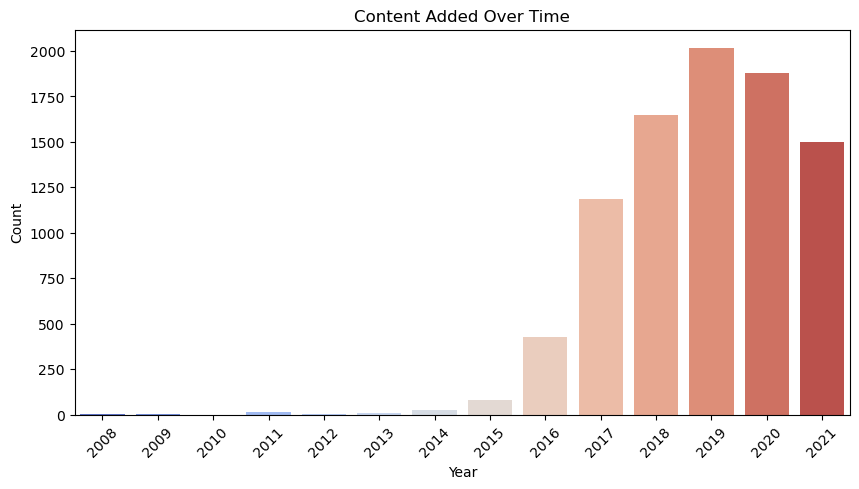

In [33]:
# Using the new created columns from Feature Engineering

# Plot content added over the years
plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### Analysis of Netflix's Yearly Content Additions
> 2019 (2,016 additions) was Netflix's biggest year for new content.             
> 2020 (1,879) saw sustained high output.
> 2018 (1,648) marked the beginning of heavy investment in originals.                
> Steady growth from 2016 (426) to 2017 (1,185)                 
> 2021 (1,498) shows a deliberate pullback after peak years.

-------------------------------------------------------------------------------------------------------------

#### 4. Release Year vs. Added to Netflix

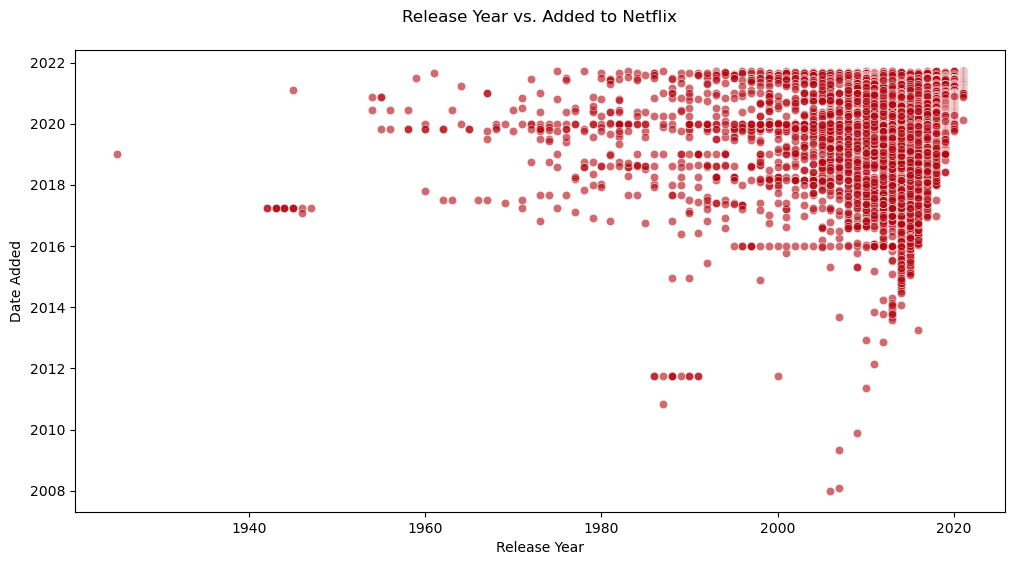

In [34]:
#  Plot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(
    data=df,
    x='release_year',
    y='date_added',
    color=NETFLIX_RED,
    alpha=0.6  # Transparency for overlapping points
)
plt.title('Release Year vs. Added to Netflix', pad=20)
plt.xlabel('Release Year')
plt.ylabel('Date Added')
plt.show()

-------------------------------------------------------------------------------------------------------------

#### 4. Yearly releases of Movies and TV Shows on Netflix

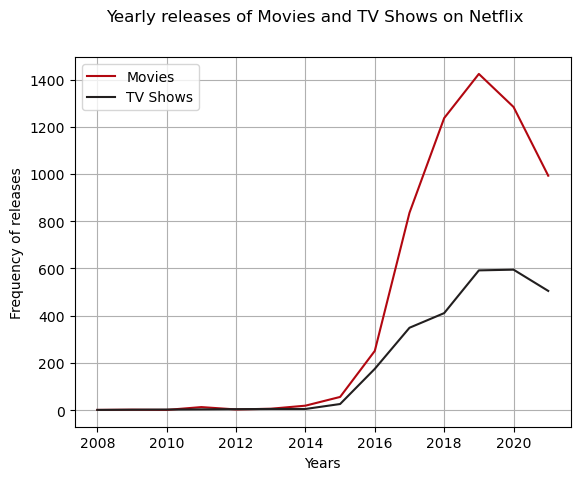

In [35]:
yearly_movie_releases=df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index,yearly_movie_releases.values, label='Movies', color = NETFLIX_RED)
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows', color = NETFLIX_DARK)
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()


-------------------------------------------------------------------------------------------------------------

#### 5. Monthly releases of Movies and TV shows on Netflix

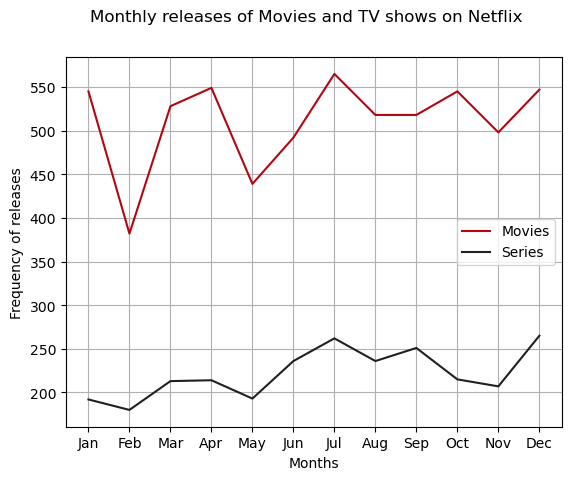

In [36]:
monthly_movie_release=df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie_release.index,monthly_movie_release.values, label='Movies', color = NETFLIX_RED)
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series', color = NETFLIX_DARK)
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

### Step 6: Insights gathered from Netflix's Content Analysis : 

1. Movies dominate the catalog, making up ~70% of the total content, while TV shows account for only ~30%.
2. Top Directors are Rajiv Chilaka (20 titles), Alastair Fothergill (18 titles), Raúl Campos & Jan Suter (18 titles), Suhas Kadav (16 titles), Marcus Raboy (16 titles).
3. TV-MA, TV-14 and R-rated content make up ~70% of the catalog, setting Netflix apart from family-focused.
4. Movies skew toward adult audiences (R, PG-13), while TV balances broader demographics(TV-Y, TV-Y7,TV-14) and No G/PG-rated TV shows exist.
5. International Movies/TV Shows dominate the library(~30% of listed genre), Dramas (2,426) and TV Dramas (762) are highlight, 
Comedies (1,674) and TV Comedies (573) indicate strong demand
6. Dramas, International Movies" (362), Documentaries (359), Stand-Up Comedy (334) are the top hybrid categories of Movies Genre. And "Kids' TV" (219), 
"International TV Shows, TV Dramas" (121) and "Crime TV Shows, International TV Shows, TV Dramas" (110)are Top of TV Shoes Genres
7. Movie Duration have a strong preference for 90–120-minute films and few movies exceed 150 minutes or fall below 60 minutes. And TV Show Seasons Distribution shows a steep decline after Season 3, with most TV shows (1,000+) having ≤3 seasons.
 .